<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/bagging_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

In [2]:
# Generating 100 samples with some added noise to make the classification problem more realistic.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25)

In [3]:
# Importing the 'train_test_split' function to split the dataset into a training set and a testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [4]:
# Fitting the BaggingClassifier to the training data.
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=5)
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=5)

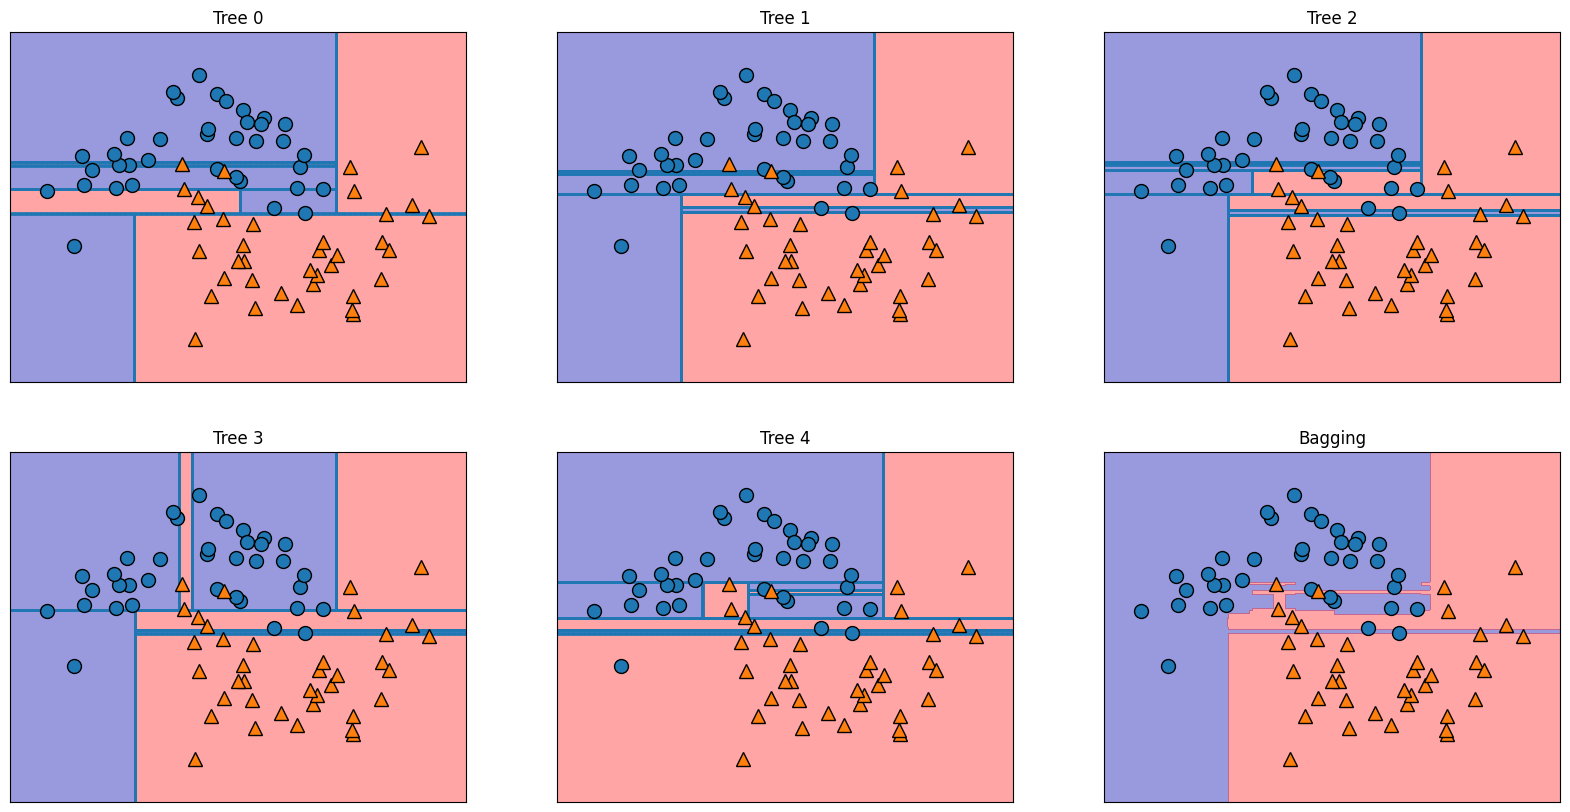

In [5]:
import matplotlib.pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Looping through each subplot axis and corresponding decision tree in the bagging ensemble.
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    # Setting the title for each subplot to indicate the tree number.
    ax.set_title("Tree {}".format(i))
    # Plotting the decision boundary and the training points for each tree.
    plot_tree_partition(X_train, y_train, tree, ax=ax)

# Plotting the decision boundary for the bagging ensemble on the last subplot.
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

# Setting the title for the last subplot to "Bagging".
axes[-1, -1].set_title("Bagging")

# Plotting the training points with a scatter plot to show the dataset distribution.
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
